<a href="https://colab.research.google.com/github/Camiladelima/energia-renovavel/blob/main/Previs%C3%A3o_do_Uso_de_Energia_Renov%C3%A1vel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear

**Objetivos**: Aprender o que é Regressão Linear e introduzir intuições sobre o Método do Gradiente e o Método do Gradiente Estocástico assim como os problemas de regressão de aprendizagem de máquina. Apresentar a biblioteca `SciKit-Learn`.

## Definição - Regressão Linear

> Uma regressão linear faz uma predição simplesmente computando uma soma ponderada dos atributos (*features*), mais uma constante chamada viés (*bias*), também chamado de constante (*intercept*).

$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n$$

$\hat{y}$ - valor previsto

$\theta$ - parâmetro do modelo

$n$ - número de atributos (*features*)

$x_i$ - o valor do *inésimo* atributo (*feature*)

### Exemplo

$$\mathrm{preço~de~residência} = 4500 + 1000\times \mathrm{quartos} + 120 \times \mathrm{m}^2 + 3000 \times \mathrm{banheiros} - 1500 \times \mathrm{distância~do~centro~km}$$

### *Mean Squared Error* (MSE) - Erro Quadrático Médio

$$MSE = \frac{1}{m}\Sigma_{i=1}^{m}{(\hat{y}_i - y_i)^2}$$

### *Mean Absolute Error* (MAE) - Erro Absoluto Médio
$$MAE = \frac{1}{m}\Sigma_{i=1}^{m}{|\hat{y}_i - y_i|}$$

### Importar as Bibliotecas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Carregar a base de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
baseenergia = pd.read_csv('/content/drive/MyDrive/t_stg_energia_202311221907.csv', encoding='utf-8')

Mounted at /content/drive


### Converter variáveis categóricas para numéricas usando Label Encoding

In [ ]:
label_encoders = {}
for column in baseenergia.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    baseenergia[column] = le.fit_transform(baseenergia[column])
    label_encoders[column] = le

print(baseenergia.head())

   Country  Product  Flow  year      value
0       48        9     9  2015  41.035477
1       48        9     9  2016  41.204037
2       48        9     9  2017  40.522600
3       48        9     9  2018  34.292442
4       48        9     9  2019  34.116425


### Remover valores NaN (Not a Number)

In [ ]:
baseenergia = baseenergia.dropna()

### Verificar se ainda há valores NaN em toda a base

In [ ]:
nan_check = baseenergia.isna().any().any()

if nan_check:
    print("Ainda existem valores NaN na base de dados.")
else:
    print("Não há mais valores NaN na base de dados.")

Não há mais valores NaN na base de dados.


### Verificar o número de registros restantes na base após a remoção de NaNs




In [ ]:
num_registros_restantes = baseenergia.shape[0]
print(f'O número de registros após a remoção de NaNs é: {num_registros_restantes}')

O número de registros após a remoção de NaNs é: 275394


### Quebrando dataset em `train` e `test`

Usar a função do Scikit-Learn [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

#### Argumentos:

* matriz a ser dividida - `X` ou `y`
* `test_size` - `float` ou `int` do tamanho do dataset de teste (padrão $0.25$)
* `train_size` - padrão `1 - test_size`
* `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)

### Separar variáveis independentes (X) e variável dependente (y)

In [ ]:
X = baseenergia.drop('value', axis=1)
y = baseenergia['value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

### Print do tamanho

In [ ]:
print(f"Tamanho de X_train: {X_train.shape}")
print(f"Tamanho de X_test: {X_test.shape}")
print(f"Tamanho de y_train: {y_train.shape}")
print(f"Tamanho de y_test: {y_test.shape}")

Tamanho de X_train: (206545, 4)
Tamanho de X_test: (68849, 4)
Tamanho de y_train: (206545,)
Tamanho de y_test: (68849,)


###  Exibir primeiras linhas do conjunto





In [ ]:
print(X_train.head())

        Country  Product  Flow  year
61036        43       10    11  2001
234243       24       10     0  2008
159071        7        0     5  1986
165955        8        5     8  2020
121057        2       10     1  1972


In [ ]:
print(X_test.head())

        Country  Product  Flow  year
135          48        2     8  2000
28878        39       10     7  1993
3854         49        5     3  2019
216192       21        9     9  2007
94599        36        1     6  2014


In [ ]:
print(y_train.head())

61036       372.787100
234243     2385.774000
159071       54.631557
165955        6.809047
121057    28925.000000
Name: value, dtype: float64


In [ ]:
print(y_test.head())

135           0.000000
28878     15863.096000
3854          0.000000
216192        1.029651
94599    -15959.282000
Name: value, dtype: float64


### Regressão Linear
Usar o estimador do Scikit-Learn [`sklearn.linear_model.LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

#### Retorna:
* Objeto `estimator` do Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()

### Classe `Estimators`

* `.fit()` - Treina o Modelo
    * `X`
    * `y`
* `.predict()` - Gera predições do modelo
    * `X`
* `.coef_` - Retorna os coeficientes do modelo ($\theta_i$)
* `.intercept_` - Retorna o viés/constante (*bias/intercept*) do modelo ($\theta_0$)

### Saber os nomes das Colunas em x

In [ ]:
print(X_train.columns)

Index(['Country', 'Product', 'Flow', 'year'], dtype='object')


### Saber o nome da coluna em Y

In [ ]:
print(y_train.name)

value


### Classe Estimators

In [ ]:
clf.fit(X_train, y_train)

LinearRegression()

###  Converter os coeficientes do modelo linear (clf) em uma lista

In [ ]:
clf.coef_.tolist()

[790.8315601904463, 5211.89776227716, -8453.548302460242, 715.4683779587922]

### Coeficientes do modelo


In [ ]:
for feature, coef in zip(X_train.columns, clf.coef_.tolist()):
    print(f"{feature}: {round(coef, 2)}")

Country: 790.83
Product: 5211.9
Flow: -8453.55
year: 715.47



### Constante do modelo

In [ ]:
print(f"Constante: {round(clf.intercept_, 2)}")

Constante: -1397630.98


### Erro do Modelo


### Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

### Avaliar o desempenho do modelo
* mae = mean_absolute_error(y_test, y_pred)
* mse = mean_squared_error(y_test, y_pred)
* r2 = r2_score(y_test, y_pred)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = clf.predict(X_test)

print(f"MSE de Teste: {mean_squared_error(y_test, y_pred):1.1f}")
print(f"MAE de Teste: {mean_absolute_error(y_test, y_pred):1.1f}")
print(f"R²: {r2_score(y_test, y_pred)}")


MSE de Teste: 153434232590.6
MAE de Teste: 57910.3
R²: 0.008132723662846342


### Visualização dos Resultados


###Gráfico de Dispersão (Scatter Plot) das Previsões vs. Valores Reais:
>Este gráfico ajuda a visualizar o quão bem as previsões do modelo correspondem aos valores reais. Quanto mais próximos os pontos estiverem da linha diagonal, melhor.

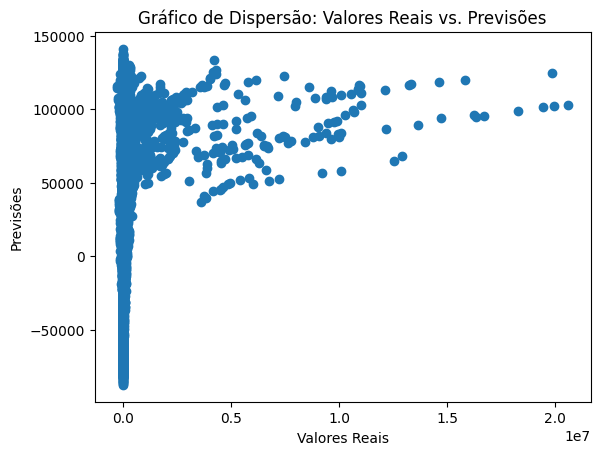

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Gráfico de Dispersão: Valores Reais vs. Previsões")
plt.show()


###Gráfico de Resíduos:
> Os resíduos são as diferenças entre os valores reais e as previsões do modelo. Um gráfico de resíduos pode ajudar a identificar padrões não capturados pelo modelo.

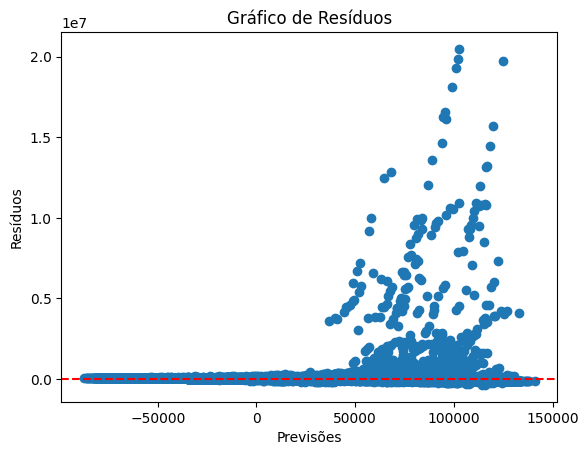

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Previsões")
plt.ylabel("Resíduos")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Gráfico de Resíduos")
plt.show()


###Histograma dos Resíduos:
> Um histograma dos resíduos pode fornecer insights sobre a distribuição dos erros do modelo.

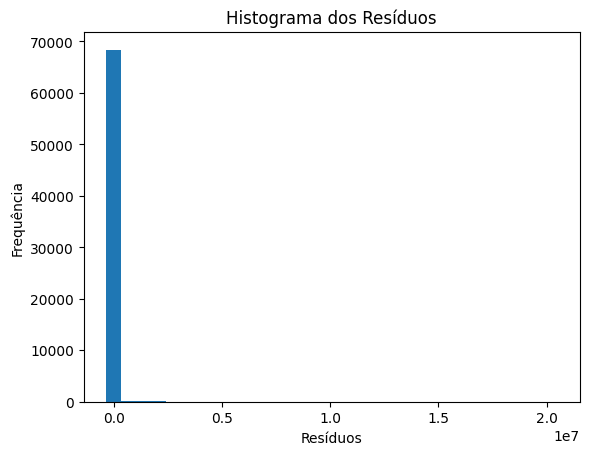

In [ ]:
plt.hist(residuals, bins=30)
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Histograma dos Resíduos")
plt.show()


###Gráfico de Linha para Comparar Valores Reais e Previsões ao Longo do Tempo (se aplicável):
> Se a variável "year" for uma característica significativa, você pode plotar valores reais e previsões ao longo do tempo.

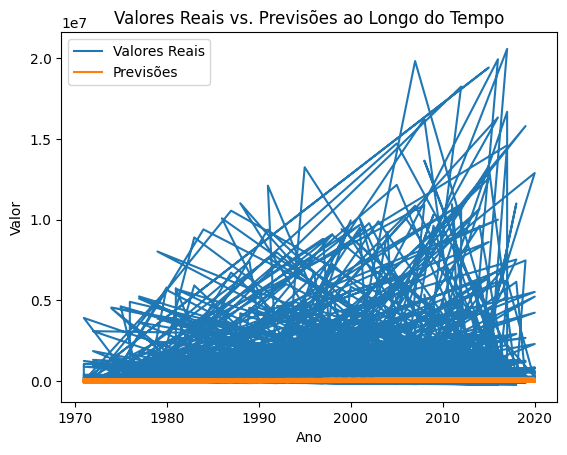

In [ ]:
plt.plot(X_test['year'], y_test, label='Valores Reais')
plt.plot(X_test['year'], y_pred, label='Previsões')
plt.xlabel("Ano")
plt.ylabel("Valor")
plt.title("Valores Reais vs. Previsões ao Longo do Tempo")
plt.legend()
plt.show()


###Otimizações

> Remover linhas onde o valor da coluna 'value' é zero

In [ ]:
baseenergia_sem_zeros = baseenergia[baseenergia['value'] != 0]

> Exibir algumas linhas do DataFrame sem as linhas onde 'value' é zero

In [ ]:
print(baseenergia_sem_zeros)

        Country  Product  Flow  year      value
0            48        9     9  2015  41.035477
1            48        9     9  2016  41.204037
2            48        9     9  2017  40.522600
3            48        9     9  2018  34.292442
4            48        9     9  2019  34.116425
...         ...      ...   ...   ...        ...
307995       48        9     9  2010  29.404580
307996       48        9     9  2011  50.361027
307997       48        9     9  2012  51.914700
307998       48        9     9  2013  42.907410
307999       48        9     9  2014  40.538150

[179403 rows x 5 columns]


###Separar variáveis independentes (X) e variável dependente (y)


In [ ]:
X = baseenergia_sem_zeros.drop('value', axis=1)
y = baseenergia_sem_zeros['value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

###Regressão Linear
>Objeto estimator do Scikit-Learn


In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

>Classe Estimators

In [ ]:
clf.fit(X_train, y_train)

LinearRegression()

>Converter os coeficientes do modelo linear (clf) em uma lista


In [ ]:
clf.coef_.tolist()

[1205.5288341079915,
 5634.0898131375525,
 -12181.954942690092,
 890.9657228516799]

>Coeficiente do modelo

In [ ]:
for feature, coef in zip(X_train.columns, clf.coef_.tolist()):
    print(f"{feature}: {round(coef, 2)}")

Country: 1205.53
Product: 5634.09
Flow: -12181.95
year: 890.97


>Constante do modelo

In [ ]:
print(f"Constante: {round(clf.intercept_, 2)}")

Constante: -1729160.85


###Erro do Modelo
>Fazer previsões no conjunto de teste
>
>Avaliar o desempenho do modelo

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = clf.predict(X_test)

print(f"MSE de Teste: {mean_squared_error(y_test, y_pred):1.1f}")
print(f"MAE de Teste: {mean_absolute_error(y_test, y_pred):1.1f}")
print(f"R²: {r2_score(y_test, y_pred)}")

MSE de Teste: 258200651342.3
MAE de Teste: 85681.5
R²: 0.011286421414455905


###Visualização dos Resultados
>Gráfico de Dispersão (Scatter Plot) das Previsões vs. Valores Reais:

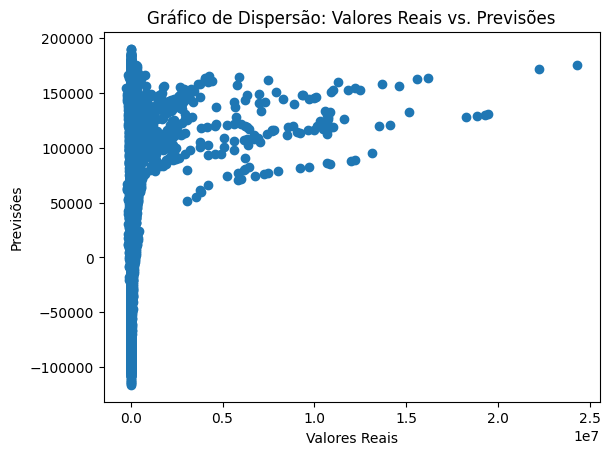

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Gráfico de Dispersão: Valores Reais vs. Previsões")
plt.show()

> Gráfico de Resíduos:

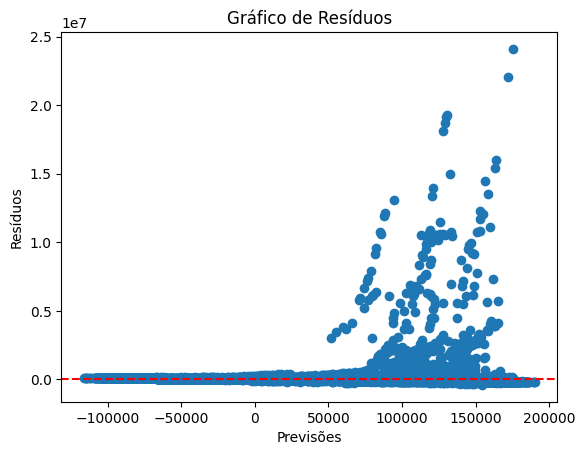

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Previsões")
plt.ylabel("Resíduos")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Gráfico de Resíduos")
plt.show()

>Histograma dos Resíduos:

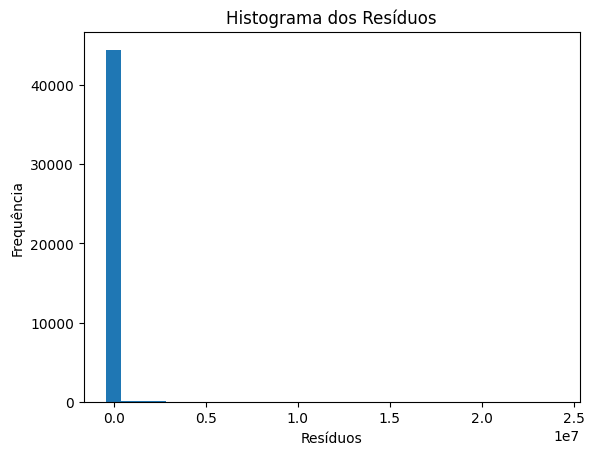

In [ ]:
plt.hist(residuals, bins=30)
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Histograma dos Resíduos")
plt.show()

>Gráfico de Linha para Comparar Valores Reais e Previsões ao Longo do Tempo (se aplicável):

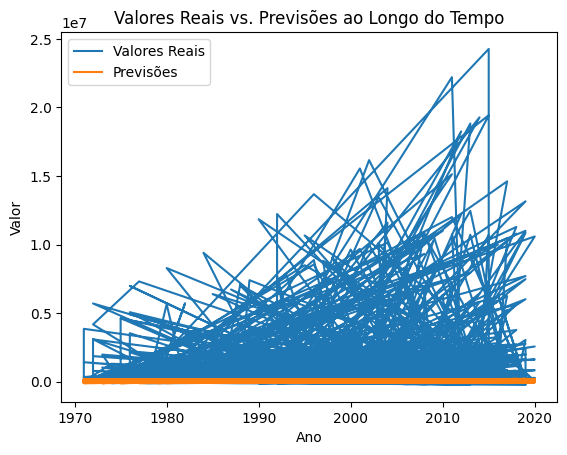

In [ ]:
plt.plot(X_test['year'], y_test, label='Valores Reais')
plt.plot(X_test['year'], y_pred, label='Previsões')
plt.xlabel("Ano")
plt.ylabel("Valor")
plt.title("Valores Reais vs. Previsões ao Longo do Tempo")
plt.legend()
plt.show()
